# **Analitic Tools Preparation (Load Libraries)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stc
import pandas as pd


import os
import pickle
import tarfile
import copy

from tqdm import tqdm
from array import array as pyarray
from sklearn.metrics import confusion_matrix as cmx
from sklearn.preprocessing import OneHotEncoder
from os.path import join
from os import listdir

import warnings
warnings.filterwarnings('ignore')

# **Data Extraction (Load Dataset CIFAR-10)**

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!tar --gunzip --extract --verbose --file=/content/drive/MyDrive/cifar-10-python.tar.gz

Mounted at /content/drive
cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


# **Data Preprocessing**

In [3]:
def unpickle(file):
    """load the cifar-10 data"""

    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data

def vectorize(X):
    return X.reshape((X.shape[0], np.prod(X.shape[1:])))

def dataSeparation(X, y, n_classes=10, arrToCol=True):
    # Convert to from square image to vector of values
    if(arrToCol): X = vectorize(X)
    # Separate data by classes    
    separatedData = [[] for i in range(n_classes)]
    for data, label in zip(X, y):
        separatedData[label].append(data)
    # Return data in a list of numpy arrays    
    return [np.array(data) for data in separatedData]   

def load_cifar_10_data(data_dir, negatives=False):
    """
    Return train_data, train_filenames, train_labels, test_data, test_filenames, test_labels
    """

    # get the meta_data_dict
    # num_cases_per_batch: 1000
    # label_names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    # num_vis: :3072

    meta_data_dict = unpickle(data_dir + "/batches.meta")
    cifar_label_names = meta_data_dict[b'label_names']
    cifar_label_names = np.array(cifar_label_names)

    # training data
    cifar_train_data = None
    cifar_train_filenames = []
    cifar_train_labels = []

    # cifar_train_data_dict
    # 'batch_label': 'training batch 5 of 5'
    # 'data': ndarray
    # 'filenames': list
    # 'labels': list

    for i in range(1, 6):
        cifar_train_data_dict = unpickle(data_dir + "/data_batch_{}".format(i))
        if i == 1:
            cifar_train_data = cifar_train_data_dict[b'data']
        else:
            cifar_train_data = np.vstack((cifar_train_data, cifar_train_data_dict[b'data']))
        cifar_train_filenames += cifar_train_data_dict[b'filenames']
        cifar_train_labels += cifar_train_data_dict[b'labels']

    cifar_train_data = cifar_train_data.reshape((len(cifar_train_data), 3, 32, 32))
    if negatives:
        cifar_train_data = cifar_train_data.transpose(0, 2, 3, 1).astype(np.float32)
    else:
        cifar_train_data = np.rollaxis(cifar_train_data, 1, 4)
    cifar_train_filenames = np.array(cifar_train_filenames)
    cifar_train_labels = np.array(cifar_train_labels)

    # test data
    # cifar_test_data_dict
    # 'batch_label': 'testing batch 1 of 1'
    # 'data': ndarray
    # 'filenames': list
    # 'labels': list

    cifar_test_data_dict = unpickle(data_dir + "/test_batch")
    cifar_test_data = cifar_test_data_dict[b'data']
    cifar_test_filenames = cifar_test_data_dict[b'filenames']
    cifar_test_labels = cifar_test_data_dict[b'labels']

    cifar_test_data = cifar_test_data.reshape((len(cifar_test_data), 3, 32, 32))
    if negatives:
        cifar_test_data = cifar_test_data.transpose(0, 2, 3, 1).astype(np.float32)
    else:
        cifar_test_data = np.rollaxis(cifar_test_data, 1, 4)
    cifar_test_filenames = np.array(cifar_test_filenames)
    cifar_test_labels = np.array(cifar_test_labels)

    return cifar_train_data, cifar_train_filenames, cifar_train_labels, \
        cifar_test_data, cifar_test_filenames, cifar_test_labels, cifar_label_names


# **Data Visulization**

Train data:  (50000, 32, 32, 3)
Train filenames:  (50000,)
Train labels:  (50000,)
Test data:  (10000, 32, 32, 3)
Test filenames:  (10000,)
Test labels:  (10000,)
Label names:  (10,)


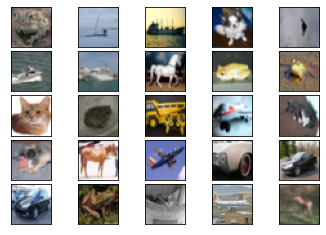

In [4]:
if __name__ == "__main__":
    """show it works"""

    cifar_10_dir = 'cifar-10-batches-py'

    train_data, train_filenames, train_labels, test_data, test_filenames, test_labels, label_names = \
        load_cifar_10_data(cifar_10_dir)

    print("Train data: ", train_data.shape)
    print("Train filenames: ", train_filenames.shape)
    print("Train labels: ", train_labels.shape)
    print("Test data: ", test_data.shape)
    print("Test filenames: ", test_filenames.shape)
    print("Test labels: ", test_labels.shape)
    print("Label names: ", label_names.shape)

    # Don't forget that the label_names and filesnames are in binary and need conversion if used.

    # display some random training images in a 25x25 grid
    num_plot = 5
    f, ax = plt.subplots(num_plot, num_plot)
    for m in range(num_plot):
        for n in range(num_plot):
            idx = np.random.randint(0, train_data.shape[0])
            ax[m, n].imshow(train_data[idx])
            ax[m, n].get_xaxis().set_visible(False)
            ax[m, n].get_yaxis().set_visible(False)
    f.subplots_adjust(hspace=0.1)
    f.subplots_adjust(wspace=0)
    plt.show()


In [5]:
print(train_data)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

# **NAIVE BAYES (Classification)**

In [6]:
def NBCDistributions(X, y, prior=None, sep=True):
    if(sep): X_sep = dataSeparation(X, y)
    else:    X_sep = X
    mean = [np.mean(x, axis=0) for x in X_sep]
    variance = [np.var(x, axis=0) for x in X_sep]
    
    if(prior==None):
         prior = np.histogram(y)[0]/len(y)
    return mean, variance, prior

def NBCPredict (X, mean, variance, prior,
                pdf=stc.multivariate_normal.logpdf):
    ProbArray = []
    for m, v, p in zip(mean, variance, prior):
        ProbArray.append(np.log(p) + pdf(X, m, v, True))
    return np.argmax(np.array(ProbArray), axis=0), \
           np.max(np.array(ProbArray), axis=0)

def NBCEvaluate(pred, y):
    accuracy = np.sum(pred == y) / len(y)
    return accuracy

In [7]:
# Model training without tracking performance
m, v, p =             NBCDistributions(train_data, train_labels)
cifar_yPred_test, _ = NBCPredict (vectorize(test_data), m, v, p)
cifar_TestAccuracy =  NBCEvaluate(cifar_yPred_test, test_labels)
print("Test Accuracy on CIFAR for NBC: %.2f %%"%(cifar_TestAccuracy*100))

Test Accuracy on CIFAR for NBC: 29.76 %


# **K-MEANS (Clustering)**

In [8]:
class DataReader:

    def __init__(self,root_dir,type='cifar-10'):
        self.root_dir = root_dir
        self.type = type
    
    def get_dict_from_pickle(self):
            self.train_dict = unpickle(join(self.root_dir,'train'))
            self.test_dict = unpickle(join(self.root_dir,'test'))
    
    def get_train_data(self):
            data = []
            labels = []
            print("Reading")
            for file_ in tqdm(listdir(self.root_dir)):
                if file_.split('_')[0] == 'data':
                    dict = unpickle(join(self.root_dir,file_))
                    data.extend(dict[b'data'])
                    labels.extend(dict[b'labels'])
            return np.array(data),np.array(labels),None
      

    def get_test_data(self):
            data = np.empty(shape=(0,3072))
            labels = []
            for file_ in listdir(self.root_dir):
                if file_.split('_')[0] == 'test':
                    dict = unpickle(join(self.root_dir,file_))
                    data = np.vstack((data,dict[b'data']))
                    print(data[data.shape[0]-1])
                    labels.append(dict[b'labels'])
            return np.array(data),np.array(labels),None
  
    def reshape_to_plot(self,data):
        if self.type == 'mnist':
            return data.reshape(data.shape[0],28,28).astype("uint8")
        return data.reshape(data.shape[0],3,32,32).transpose(0,2,3,1).astype("uint8")

    def plot_imgs(self,in_data,n,random=False):
        data = np.array([d for d in in_data])
        data = self.reshape_to_plot(data)
        x1 = min(n//2,5)
        if x1 == 0:
            x1 = 1
        y1 = (n//x1)
        x = min(x1,y1)
        y = max(x1,y1)
        fig, ax = plt.subplots(x,y,figsize=(5,5))
        i=0
        for j in range(x):
            for k in range(y):
                if random:
                    i = np.random.choice(range(len(data)))
                ax[j][k].set_axis_off()
                ax[j][k].imshow(data[i:i+1][0])
                i+=1
        plt.show()
    
    def plot_img(self,data):
        assert data.shape == (3072,)
        data = data.reshape(1,3072)
        data = data.reshape(data.shape[0],3,32,32).transpose(0,2,3,1).astype("uint8")
        fig, ax = plt.subplots(figsize=(5,5))
        ax.imshow(data[0])
        plt.show()
    
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

class KMeans:
    
    def __init__(self,n_clusters=10,max_iter=500):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        

    def init_centroids(self):
        np.random.seed(np.random.randint(0,100000))
        self.centroids = []
        for i in range(self.n_clusters):
            rand_index = np.random.choice(range(len(self.fit_data)))
            self.centroids.append(self.fit_data[rand_index])
    
    def init_clusters(self):
        self.clusters = {'data':{i:[] for i in range(self.n_clusters)}}
        self.clusters['labels']={i:[] for i in range(self.n_clusters)}

    def fit(self,fit_data,fit_labels):
        self.fit_data = fit_data
        self.fit_labels = fit_labels
        self.predicted_labels = [None for _ in range(self.fit_data.shape[0])]
        self.init_centroids()
        self.iterations = 0
        old_centroids = [np.zeros(shape=(fit_data.shape[1],)) for _ in range(self.n_clusters)]
        while not self.converged(self.iterations,old_centroids,self.centroids):
            old_centroids = copy.deepcopy(self.centroids)
            self.init_clusters()
            for j,sample in tqdm(enumerate(self.fit_data)):
                min_dist = float('inf')
                for i,centroid in enumerate(self.centroids):
                    dist = np.linalg.norm(sample-centroid)
                    if dist<min_dist:
                        min_dist = dist
                        self.predicted_labels[j] = i
                if self.predicted_labels[j] is not None:
                        self.clusters['data'][self.predicted_labels[j]].append(sample)                    
                        self.clusters['labels'][self.predicted_labels[j]].append(self.fit_labels[j])
            self.reshape_cluster()
            self.update_centroids()
            print("\nIteration:",self.iterations, 'Centroid Distance:',self.centroids_dist)
            self.iterations+=1
        self.calculate_accuracy()

    def update_centroids(self):
        for i in range(self.n_clusters):
            cluster = self.clusters['data'][i]
            if cluster == []:
                self.centroids[i] = self.fit_data[np.random.choice(range(len(self.fit_data)))]
            else:
                self.centroids[i] = np.mean(np.vstack((self.centroids[i],cluster)),axis=0)
    
    def reshape_cluster(self):
        for id,mat in list(self.clusters['data'].items()):
            self.clusters['data'][id] = np.array(mat)

    def converged(self,iterations,centroids,updated_centroids):
        if iterations > self.max_iter:
            return True
        self.centroids_dist = np.linalg.norm(np.array(updated_centroids)-np.array(centroids))
        if self.centroids_dist<=1e-10:
            print("Converged! With distance:",self.centroids_dist)
            return True
        return False

    
    def calculate_accuracy(self):
        self.clusters_labels = []
        self.clusters_info = []
        self.clusters_accuracy = []
        for clust,labels in list(self.clusters['labels'].items()):
            if isinstance(labels[0],(np.ndarray)):
                labels = [l[0] for l in labels]
            occur = 0
            max_label = max(set(labels), key=labels.count)
            self.clusters_labels.append(max_label)
            for label in labels:
                if label == max_label:
                    occur+=1
            acc = occur/len(list(labels))
            self.clusters_info.append([max_label,occur,len(list(labels)),acc])
            self.clusters_accuracy.append(acc)
            self.accuracy = sum(self.clusters_accuracy)/self.n_clusters
        self.labels_ = []
        for i in range(len(self.predicted_labels)):
            self.labels_.append(self.clusters_labels[self.predicted_labels[i]])
        print('[cluster_label,no_occurence_of_label,total_samples_in_cluster,cluster_accuracy]',self.clusters_info)
        print(" ")
        print("Test Accuracy on CIFAR for K-Means: %.2f %%"%(self.accuracy*100))

Reading


100%|██████████| 8/8 [00:00<00:00, 47.09it/s]


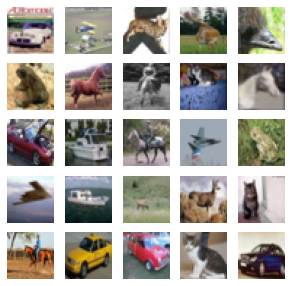

In [9]:
data_reader = DataReader('/content/cifar-10-batches-py','cifar-10')
tr_data, tr_class_labels, tr_subclass_labels = data_reader.get_train_data()
data_reader.plot_imgs(tr_data,25,True)

In [10]:
kmeans = KMeans(n_clusters=10,max_iter=10)
kmeans.fit(tr_data,tr_class_labels)

50000it [00:06, 8254.12it/s]



Iteration: 0 Centroid Distance: 21479.539357258105


50000it [00:06, 7572.36it/s]



Iteration: 1 Centroid Distance: 11712.371816575294


50000it [00:06, 7627.14it/s]



Iteration: 2 Centroid Distance: 2070.2540294037126


50000it [00:06, 7618.60it/s]



Iteration: 3 Centroid Distance: 888.7723885627097


50000it [00:06, 7632.58it/s]



Iteration: 4 Centroid Distance: 570.8930088654369


50000it [00:06, 7610.97it/s]



Iteration: 5 Centroid Distance: 428.1530799912726


50000it [00:06, 7566.07it/s]



Iteration: 6 Centroid Distance: 354.0034807364256


50000it [00:06, 7663.61it/s]



Iteration: 7 Centroid Distance: 303.48262762999076


50000it [00:06, 7616.18it/s]



Iteration: 8 Centroid Distance: 279.0121233512191


50000it [00:06, 7654.06it/s]



Iteration: 9 Centroid Distance: 261.9063542558725


50000it [00:06, 7693.07it/s]



Iteration: 10 Centroid Distance: 230.40858324200917
[cluster_label,no_occurence_of_label,total_samples_in_cluster,cluster_accuracy] [[8, 1183, 5326, 0.2221179121291776], [7, 512, 3267, 0.15671870217324763], [6, 1023, 5862, 0.1745138178096213], [8, 1494, 4241, 0.3522754067436925], [0, 1221, 3993, 0.30578512396694213], [6, 1067, 5009, 0.21301657017368736], [9, 1475, 5063, 0.2913292514319573], [5, 1248, 6593, 0.18929167298650085], [7, 909, 5849, 0.15541118139852966], [5, 788, 4797, 0.16426933500104232]]
 
Test Accuracy on CIFAR for K-Means: 22.25 %


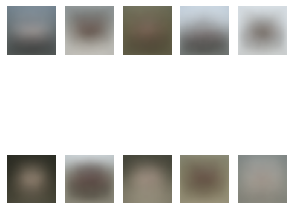

In [11]:
data_reader.plot_imgs(kmeans.centroids,len(kmeans.centroids))

Cluster: 0 Label: ship


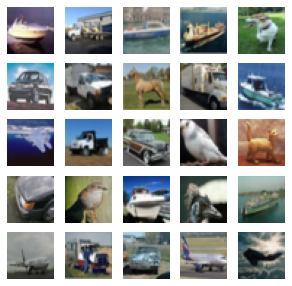

Cluster: 1 Label: horse


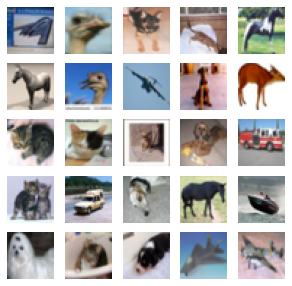

Cluster: 2 Label: frog


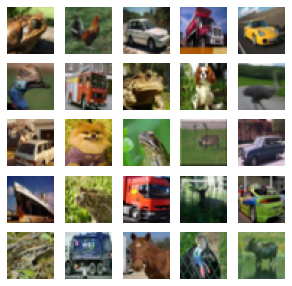

Cluster: 3 Label: ship


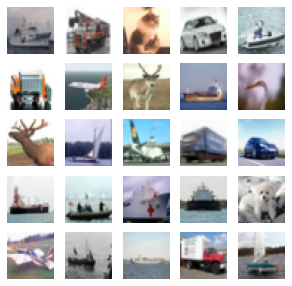

Cluster: 4 Label: airplane


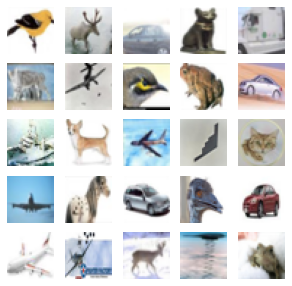

Cluster: 5 Label: frog


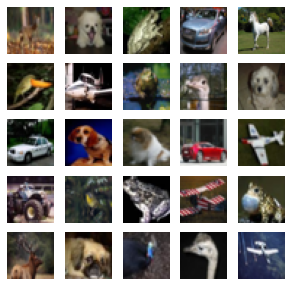

Cluster: 6 Label: truck


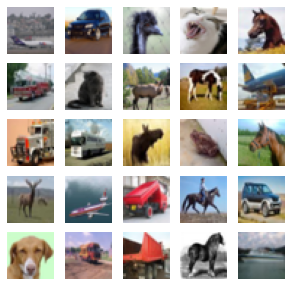

Cluster: 7 Label: dog


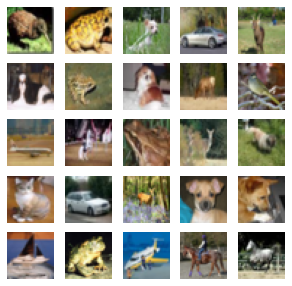

Cluster: 8 Label: horse


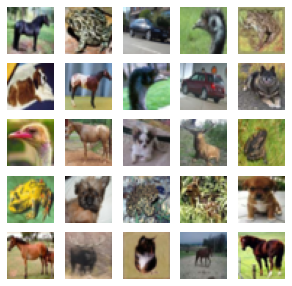

Cluster: 9 Label: dog


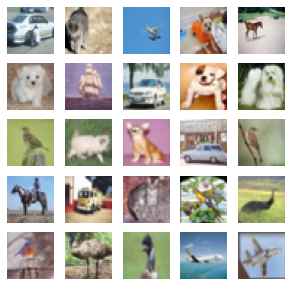

In [12]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for key,data in list(kmeans.clusters['data'].items()):
    print('Cluster:',key,'Label:',classes[kmeans.clusters_labels[key]])
    data_reader.plot_imgs(data[:min(25,data.shape[0])],min(25,data.shape[0]))

# **Model Validation**

In [13]:
print("Test Accuracy on CIFAR for NBC: %.2f %%"%(cifar_TestAccuracy*100))
print("Test Accuracy on CIFAR for K-Means: %.2f %%"%(kmeans.accuracy*100))

Test Accuracy on CIFAR for NBC: 29.76 %
Test Accuracy on CIFAR for K-Means: 22.25 %
